In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import time
import cv2
from PIL import Image

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import save

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "videos/frames/")

/Users/heiki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 81

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [4]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
print(class_names.index('bottle'))
print(class_names[63])

40
tv


In [18]:
img_dir = '/Users/heiki/Development/Mask_RCNN/videos/frames/orange_tea/'
file_names = next(os.walk(img_dir))[2]
folder_path = '/Users/heiki/Development/Mask_RCNN/videos/bounding_boxes/orange_tea/'
img_ext = '.png'
padding_size = 10
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [19]:
print("Total number of images: {}".format(len(file_names)))
for index, file_name in enumerate(file_names):
    image = skimage.io.imread(os.path.join(img_dir, file_name))
    # Run detection
    result = model.detect([image], verbose=0)
    r = result[0]
    bottle_index = np.where(r['class_ids'] == 40)[0][0]
    r['masks'] = r['masks'][:, :, bottle_index:bottle_index + 1]
    r['rois'] = r['rois'][bottle_index:bottle_index + 1]
    r['class_ids'] = r['class_ids'][bottle_index:bottle_index + 1]
    left, top, right, bottom = r['rois'][0]
    img = Image.fromarray(image, 'RGB')
    cropped = img.crop((top - padding_size, left - padding_size, bottom + padding_size, right + padding_size))
    file_id, file_extension = os.path.splitext(file_name)
    new_name = file_id + img_ext
    img_path = os.path.join(folder_path, new_name)
    cropped.save(img_path, "PNG")
    print("Saved image {img_name}. {no_left} images remaining.".format(img_name=new_name, no_left=len(file_names) - index - 1))

Total number of images: 295
Saved image frame030.png. 294 images remaining.
Saved image frame024.png. 293 images remaining.
Saved image frame018.png. 292 images remaining.
Saved image frame232.png. 291 images remaining.
Saved image frame226.png. 290 images remaining.
Saved image frame144.png. 289 images remaining.
Saved image frame150.png. 288 images remaining.
Saved image frame178.png. 287 images remaining.
Saved image frame187.png. 286 images remaining.
Saved image frame193.png. 285 images remaining.
Saved image frame192.png. 284 images remaining.
Saved image frame186.png. 283 images remaining.
Saved image frame179.png. 282 images remaining.
Saved image frame151.png. 281 images remaining.
Saved image frame145.png. 280 images remaining.
Saved image frame227.png. 279 images remaining.
Saved image frame233.png. 278 images remaining.
Saved image frame019.png. 277 images remaining.
Saved image frame025.png. 276 images remaining.
Saved image frame031.png. 275 images remaining.
Saved image 

Saved image frame106.png. 123 images remaining.
Saved image frame112.png. 122 images remaining.
Saved image frame113.png. 121 images remaining.
Saved image frame107.png. 120 images remaining.
Saved image frame259.png. 119 images remaining.
Saved image frame265.png. 118 images remaining.
Saved image frame271.png. 117 images remaining.
Saved image frame098.png. 116 images remaining.
Saved image frame067.png. 115 images remaining.
Saved image frame073.png. 114 images remaining.
Saved image frame065.png. 113 images remaining.
Saved image frame071.png. 112 images remaining.
Saved image frame059.png. 111 images remaining.
Saved image frame267.png. 110 images remaining.
Saved image frame273.png. 109 images remaining.
Saved image frame111.png. 108 images remaining.
Saved image frame105.png. 107 images remaining.
Saved image frame139.png. 106 images remaining.
Saved image frame138.png. 105 images remaining.
Saved image frame104.png. 104 images remaining.
Saved image frame110.png. 103 images rem

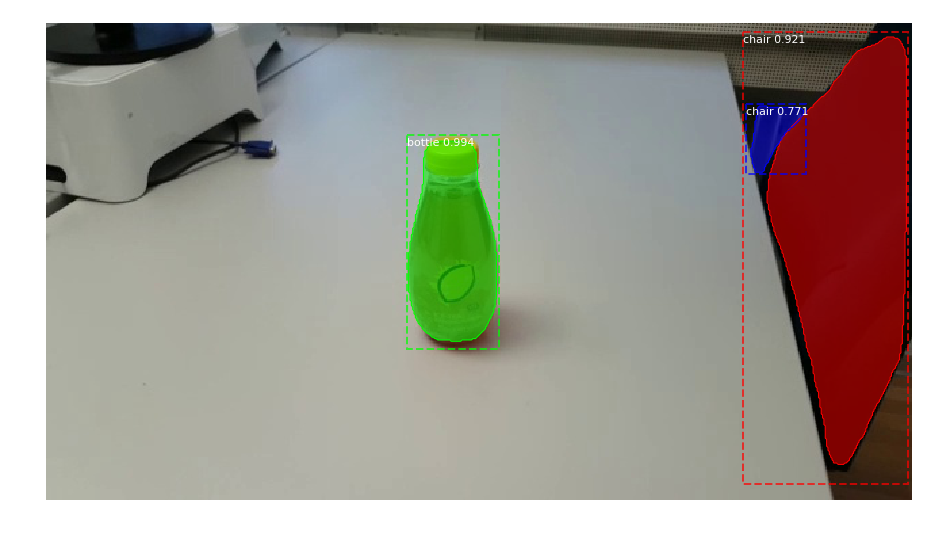

In [13]:
# Visualize results
image = skimage.io.imread(os.path.join(img_dir, file_names[0]))
# Run detection
result = model.detect([image], verbose=0)
r = result[0]
bottle_index = np.where(r['class_ids'] == 40)[0][0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [14]:
r['masks'] = r['masks'][:, :, bottle_index:bottle_index + 1]
r['rois'] = r['rois'][bottle_index:bottle_index + 1]
r['class_ids'] = r['class_ids'][bottle_index:bottle_index + 1]

In [15]:
left, top, right, bottom = r['rois'][0]
img = Image.fromarray(image, 'RGB')
w, h = img.size
img.show()
cropped = img.crop((top - 10, left - 10, bottom + 10, right + 10))
file_name = file_names[0]
img_path = os.path.join(folder_path, file_name)
cropped.save(img_path)
#save.save_instance(image=image, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], class_names=class_names, scores=r['scores'], show_bbox=True, show_mask=False, save_path=img_path)